# E1 가위바위보 분류기 만들기

일시: 2020년 1월 5일 화요일

*****

**1. 가위 손모양, 바위 손모양, 보 손모양을 [teachable machine](https://teachablemachine.withgoogle.com/)에서 찍어서 이미지를 저장합니다.
이때 저장 경로는 ~/aiffel/rock_scissor_paper에 각각 scissor, rock, paper 디렉토리를 만들어 이미지를 저장했습니다.**

**2. PTL 라이브러리가 설치되어 있지 않아 설치했습니다. 원래 코드에는 numpy가 없는데 이 라이브러리가 없으면 이미지 읽기가 안되서 추가했습니다.**

In [5]:
# PIL 라이브러리가 설치되어 있지 않다면 설치
!pip install pillow   

from PIL import Image
import os, glob
import numpy as np

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


**3. 가위 이미지가 저장된 디렉토리 안의 모든 이미지 파일을 읽어들여, 파일마다 사이즈를 28x28 사이즈로 바꾸어 저장합니다. 바위와 보도 똑같이 이미지 크기를 맞춰줍니다.**

In [6]:
# 가위
import os

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")  

target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("가위 이미지 resize 완료!")

# 바위
import os

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")  

target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("바위 이미지 resize 완료!")

# 보
import os

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")  

target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("보 이미지 resize 완료!")

이미지 디렉토리 경로:  /home/aiffel/aiffel/rock_scissor_paper/scissor
가위 이미지 resize 완료!
이미지 디렉토리 경로:  /home/aiffel/aiffel/rock_scissor_paper/rock
바위 이미지 resize 완료!
이미지 디렉토리 경로:  /home/aiffel/aiffel/rock_scissor_paper/paper
보 이미지 resize 완료!


**4. 데이터를 읽을 ```load_data()```함수를 만든다. 이 함수는 입력으로 이미지가 있는 폴더 위치를 받으므로 rock_scissor_paper 폴더 위치를 적어줍니다. 그리고 가위바위보는 클래스가 3개이기 때문에 color을 3으로 적어줍니다. 여기서 가위는 0, 바위는 1, 보는 2입니다.    
데이터는 가위, 바위, 보의 각 클래스마다 저 곽정은 100장, 정병찬님 98장, 유기표님 100장, 김이삭님 100장, 조웅제님 100장, 정미리님 2장의 사진을 사용하여 각 500장씩 총 1,500장의 시험 데이터 셋을 만들었습니다.**

In [7]:
def load_data(img_path):
    number_of_data=2100   # 가위바위보 이미지 개수 총합에 주의
    img_size=28
    color=3
    # 이미지 데이터와 라벨 데이터를 담을 행렬(matrix) 영역을 생성
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위
        idx=idx+1       
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는",idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 2100 입니다.
x_train shape: (2100, 28, 28, 3)
y_train shape: (2100,)


**5. 맞게 불러왔는지 첫번째 이미지를 불러와서 확인을 해봅니다. 잘되는군요.**

라벨:  0


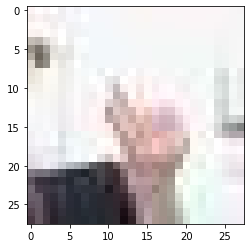

In [8]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0])
print('라벨: ', y_train[0])

**6. 데이터 준비를 마쳤으니 딥러닝 네트워크를 설계합니다. MNIST에서는 이미지가 흑백이라서 채널이 1이었지만 현재 이미지는 RGB를 모두 가지고 있어 채널을 3개로 해줘야 합니다. 같은 팀원인 지효님의 도움으로 찾아낼 수 있었습니다!**

In [25]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

n_channel_1=50
n_channel_2=100
n_dense=100
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 50)        1400      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 13, 13, 50)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 11, 11, 100)       45100     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 5, 5, 100)         0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 2500)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 100)               250100    
_________________________________________________________________
dense_11 (Dense)             (None, 3)                

**7. 딥러닝 네트워크를 학습시킵니다. 꽤나 높은 정확도가 나왔습니다.** 

In [26]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=n_train_epoch)

Epoch 1/10
66/66 [==============================] - 0s 2ms/step - loss: 7.9324 - accuracy: 0.4810
Epoch 2/10
66/66 [==============================] - 0s 2ms/step - loss: 0.4662 - accuracy: 0.8029
Epoch 3/10
66/66 [==============================] - 0s 2ms/step - loss: 0.2161 - accuracy: 0.9210
Epoch 4/10
66/66 [==============================] - 0s 1ms/step - loss: 0.1379 - accuracy: 0.9519
Epoch 5/10
66/66 [==============================] - 0s 2ms/step - loss: 0.0511 - accuracy: 0.9871
Epoch 6/10
66/66 [==============================] - 0s 2ms/step - loss: 0.0227 - accuracy: 0.9962
Epoch 7/10
66/66 [==============================] - 0s 1ms/step - loss: 0.0112 - accuracy: 0.9986
Epoch 8/10
66/66 [==============================] - 0s 2ms/step - loss: 0.0038 - accuracy: 0.9995
Epoch 9/10
66/66 [==============================] - 0s 2ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 10/10
66/66 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 1.0000


**8. 그럼 제가 만든 딥러닝 네트워크(모델)이 얼마나 잘만들어진 것인지 알아보도록 합니다. 학습에 300장의 가위바위보 이미지를 사용했으므로 같은 팀원인 지효님의 가위바위보 이미지를 똑같이 300장 가져와 시험 데이터로 사용하겠습니다. 이미지가 잘 출력되는지 34번째 이미지를 불러와서 확인해보니 잘 나오는군요.**

이미지 디렉토리 경로:  /home/aiffel/aiffel/rock_scissor_paper/test/scissor
가위 이미지 resize 완료!
이미지 디렉토리 경로:  /home/aiffel/aiffel/rock_scissor_paper/test/rock
바위 이미지 resize 완료!
이미지 디렉토리 경로:  /home/aiffel/aiffel/rock_scissor_paper/test/paper
보 이미지 resize 완료!
시험데이터(x_test)의 이미지 개수는 300 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)
라벨:  0


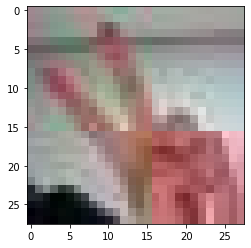

In [27]:
import os
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/scissor"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")  

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("가위 이미지 resize 완료!")

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/rock"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")  

target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("바위 이미지 resize 완료!")

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/paper"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")  

target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("보 이미지 resize 완료!")

def load_data(img_path):
    number_of_data=300
    img_size=28
    color=3
    
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img   
        labels[idx]=0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img 
        labels[idx]=1
        idx=idx+1       
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img 
        labels[idx]=2  
        idx=idx+1
        
    print("시험데이터(x_test)의 이미지 개수는",idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

import matplotlib.pyplot as plt
plt.imshow(x_test[33])
print('라벨: ', y_test[33])

**9. 훈련시킨 모델을 시험 데이터를 이용해 측정해봅니다.**

In [28]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 1.9828 - accuracy: 0.5367
test_loss: 1.9828100204467773 
test_accuracy: 0.5366666913032532


**10. 제 손 이미지를 가지고 할 때보다 정확도가 거의 반토박이 됨을 확인할 수 있습니다.**

*****

# 루브릭 평가

1. 이미지 분류기 모델은 성공적으로 작동합니다. 트레이닝도 정상적으로 수행했다고 생각합니다.

2. 데이터 셋을 다양하게 하기위해 제 손 이미지 300장 뿐만아니라 다른 수강생 분들의 이미지 1200개를 더 가져와 총 1500개의 훈련 데이터로 훈련했습니다. 정규화도 했습니다.

3. 하지만 시험 정확도는 30%에서 40%를 웃돕니다. 데이터 셋의 양을 늘리고 더 깨끗한 이미지로 훈련 데이터 셋을 보강해야 겠습니다.

# 회고

작지만 첫 딥러닝 프로젝트였습니다. MNIST 예시는 참 책에서 많이 보았었는데 실제로 해보니까 감회가 새로웠습니다.     
이번 시간을 시작하기 전에 사실 겁을 많이 먹었습니다. 어렵고 나만 이해하면 어쩌나하는 걱정해서였죠. 걱정대로 어렵긴했지만 다 같이 어려워했다는 것에 위안을 삼으려합니다. 
가장 재밌었던 부분은 model.fit을 돌리고 정확도가 얼마나 나올지 보는 부분이었습니다. 제발 높은 정확도가 나오길 두근두근하며 기다렸네요.